In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data.head(2)

/Users/nadejdaberzina/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sale_date_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455.0,168308.0,(197312) Пакет-майка 25см х 45см,906.0,205.0,-1.0,"1,00"
1,2018-12-07,198287,279.0,134832.0,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,-1.0,"1,00"


In [3]:
data.rename(columns = {'sale_date_date' : 'sale_date'}, inplace = True)

In [4]:
data.head(2)

,sale_date,contact_id,shop_id,product_id,name,product_sub_category_id,product_category_id,brand_id,quantity
0,2018-12-07,1260627,1455.0,168308.0,(197312) Пакет-майка 25см х 45см,906.0,205.0,-1.0,"1,00"
1,2018-12-07,198287,279.0,134832.0,(62448) Перекись водорода р-р наружн. 3% фл.по...,404.0,93.0,-1.0,"1,00"


## Пропущенные значения

In [5]:
# найдем строки, в которых много пропущенных значений
# это строки с индексами 20000000, 20000002, 20000001
data.isnull().sum(axis=1).nlargest(10)

20000000    9
20000002    9
20000001    7
30917       1
115502      1
235808      1
402708      1
402709      1
402711      1
550875      1
dtype: int64

In [6]:
data.loc[20000000]

sale_date                  NaN
contact_id                 NaN
shop_id                    NaN
product_id                 NaN
name                       NaN
product_sub_category_id    NaN
product_category_id        NaN
brand_id                   NaN
quantity                   NaN
Name: 20000000, dtype: object

In [7]:
data.loc[20000002]

sale_date                  NaN
contact_id                 NaN
shop_id                    NaN
product_id                 NaN
name                       NaN
product_sub_category_id    NaN
product_category_id        NaN
brand_id                   NaN
quantity                   NaN
Name: 20000002, dtype: object

In [8]:
data.loc[20000001]

sale_date                  (затронуто стр
contact_id                    к: 20000000
shop_id                               NaN
product_id                            NaN
name                                  NaN
product_sub_category_id               NaN
product_category_id                   NaN
brand_id                              NaN
quantity                              NaN
Name: 20000001, dtype: object

In [9]:
# удалим эти 3 строки
data = data.drop(labels = [20000000, 20000002, 20000001], axis = 0)

In [10]:
# посмотрим на количество пропущенных значений по столбцам
# теперь пропущенные значения есть только в столбце name
data.isnull().sum()

sale_date                      0
contact_id                     0
shop_id                        0
product_id                     0
name                       10738
product_sub_category_id        0
product_category_id            0
brand_id                       0
quantity                       0
dtype: int64

## Типы данных

In [11]:
data.dtypes

sale_date                   object
contact_id                  object
shop_id                    float64
product_id                 float64
name                        object
product_sub_category_id    float64
product_category_id        float64
brand_id                   float64
quantity                    object
dtype: object

In [12]:
# столбец sale_date - изменим тип данных на datetime
data['sale_date'] = pd.to_datetime(data.sale_date)

In [13]:
# в столбце contact_id смешанный тип данных (str и int)
data.contact_id.unique()

array([1260627, 198287, 2418385, ..., '1570654', '1924036', '1788779'],
      dtype=object)

In [14]:
# в столбце quantity тип данных str, есть ошибки - дробные числа, хотя количество должно быть целым числом.
# оставим пока что в формате object
data.quantity.unique()

array(['1,00', '2,00', '0,12', ..., '5,05', '0,776', '0,562'],
      dtype=object)

In [15]:
# в столбцах contact_id, shop_id, product_id, product_sub_category_id, product_category_id, brand_id
# изменим тип данных на int
data = data.astype({'contact_id' : 'int',
                    'shop_id' : 'int',
                    'product_id' : 'int',
                    'product_sub_category_id' : 'int',
                    'product_category_id' : 'int',
                    'brand_id' : 'int'})

In [16]:
# типы данных после преобразований
data.dtypes

sale_date                  datetime64[ns]
contact_id                          int64
shop_id                             int64
product_id                          int64
name                               object
product_sub_category_id             int64
product_category_id                 int64
brand_id                            int64
quantity                           object
dtype: object

## Анализ данных

In [17]:
data.shape

(20000000, 9)

In [18]:
clients, shops, products, categories, subcategories = data.contact_id.nunique(), data.shop_id.nunique(), data.product_id.nunique(), data.product_category_id.nunique(), data.product_sub_category_id.nunique()

transactions = data.groupby(['contact_id'])['sale_date'].nunique().sum()

print('# покупатели: ', clients)
print('# аптеки: ', shops)
print('# товары: ', products)
print('# категории: ', categories)
print('# подкатегории: ', subcategories)
print('# покупки: ', transactions)

# покупатели:  1642379
# аптеки:  851
# товары:  36549
# категории:  112
# подкатегории:  440
# покупки:  6082729


### Продажи по месяцам

In [19]:
# посмотрим, за какой период времени у нас есть данные по продажам 

In [20]:
# добавим новый столбец - месяц
data['month'] = data['sale_date'].dt.month

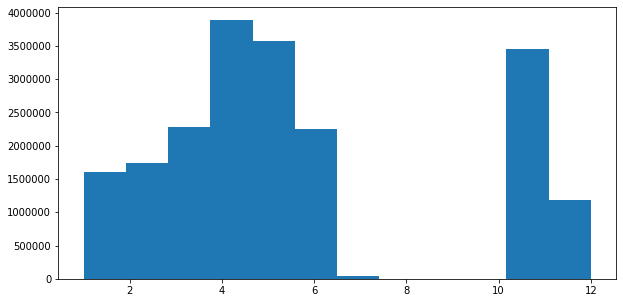

In [21]:
# построим график - продажи по месяцам
x = data['month']
num_bins = 12
plt.figure(figsize=(10, 5))
plt.hist(x, num_bins)
plt.show()

# у нас есть данные по продажам с января по начало июля, а потом за ноябрь/декабрь (часть декабря)

### Количество покупок

In [22]:
# посчитаем количество транзакций для каждого покупателя за весь рассматриваемый период
# добавим новый признак - количество покупок

In [23]:
purchase_frequency = data.groupby(['contact_id'])['sale_date'].nunique().reset_index(name='frequency')

In [24]:
purchase_frequency.head()

,contact_id,frequency
0,373,2
1,374,1
2,376,1
3,377,1
4,378,3


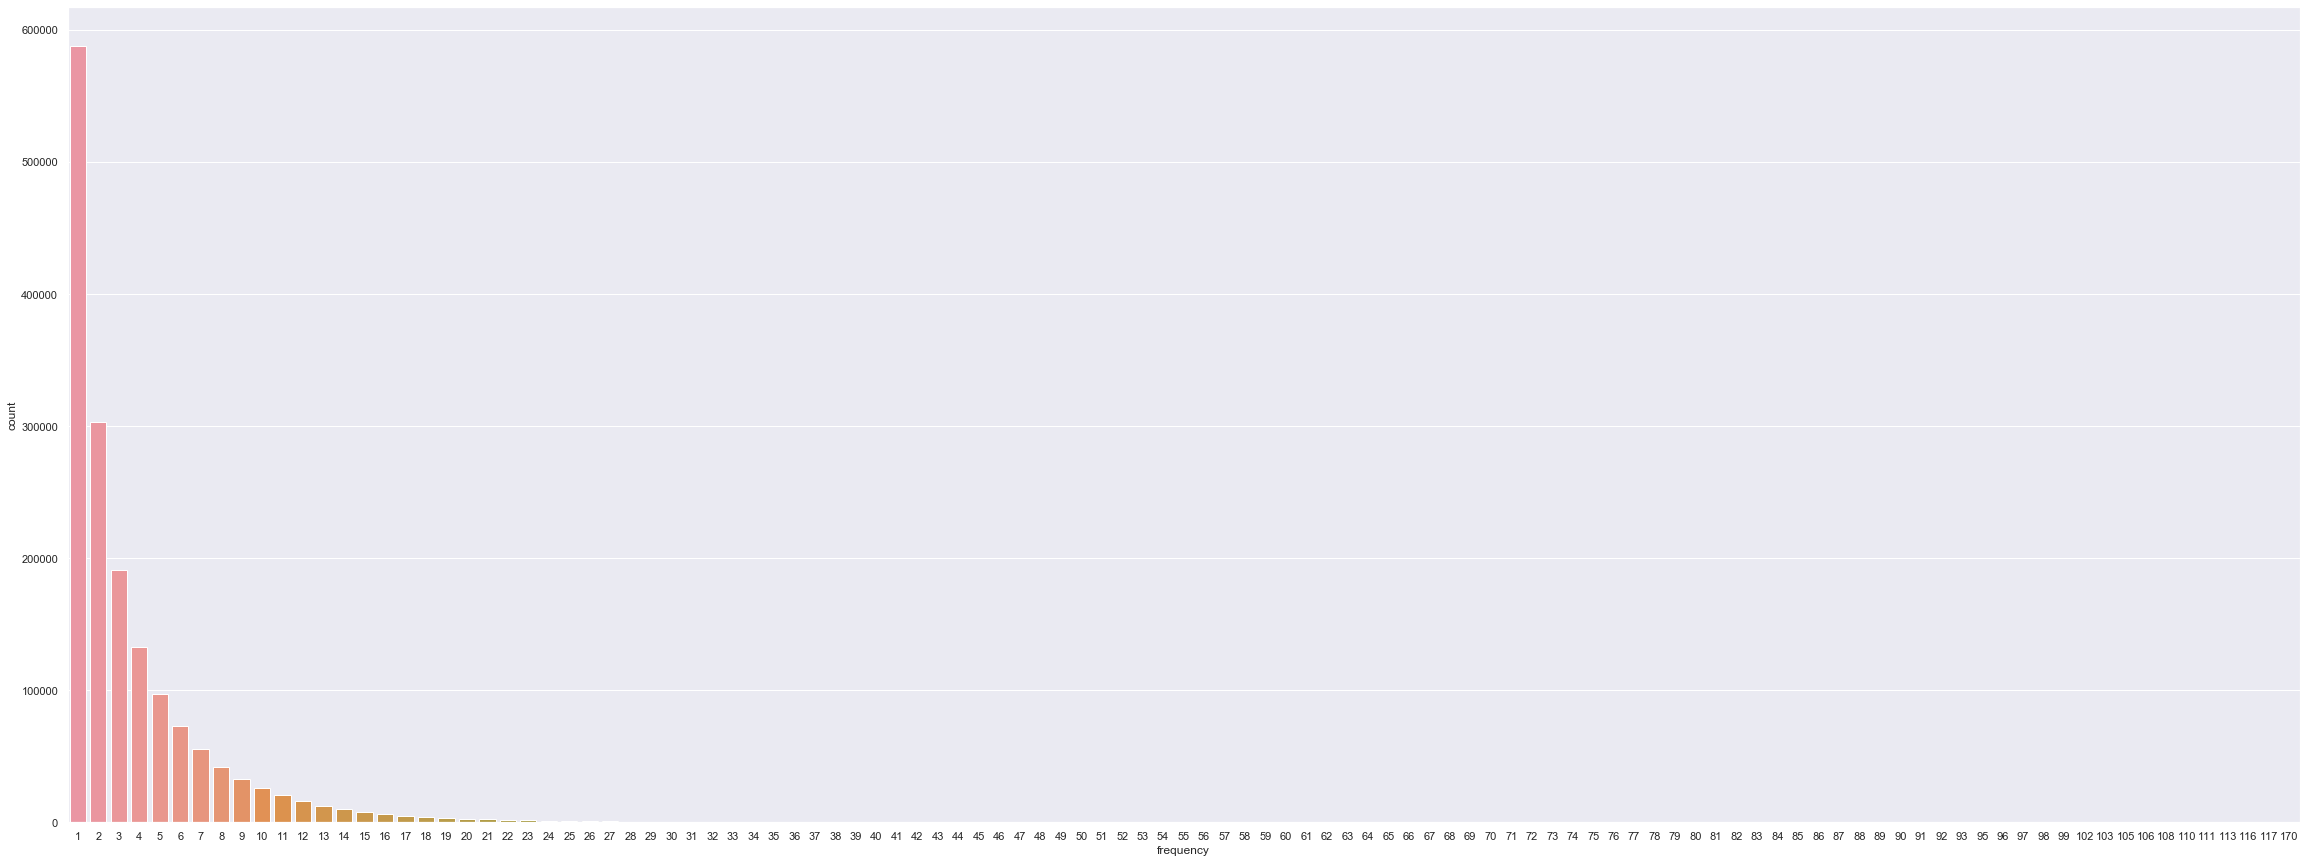

In [25]:
sns.set(rc = {'figure.figsize':(40, 15)})
sns.countplot(x='frequency', data=purchase_frequency)
plt.show()

In [26]:
# большинство покупателей совершило только одну покупку
purchase_frequency.groupby(['frequency']).size().reset_index(name='number').sort_values(by=['number'], ascending=False)

,frequency,number
0,1,588210
1,2,302904
2,3,191321
3,4,132880
4,5,97204
...,...,...
101,106,1
92,93,1
99,103,1
94,96,1


In [27]:
# 50% покупателей совершили 1 или 2 покупки
np.percentile(purchase_frequency['frequency'], [25, 50, 75])

array([1., 2., 5.])

In [28]:
np.percentile(purchase_frequency['frequency'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([  1.,   1.,   1.,   2.,   2.,   3.,   4.,   6.,   8., 170.])

### Магазины (аптеки)

In [29]:
# посчитаем количество транзакций для каждой аптеки за рассматриваемый период времени

In [30]:
# количество транзакций для каждой аптеки по дням
shops = data.groupby(['shop_id', 'sale_date'])['contact_id'].nunique().reset_index(name='number')

In [31]:
# посчитаем общее количество транзакций для каждой аптеки за рассматриваемый период
shops = shops.groupby(['shop_id'])['number'].sum().reset_index(name='number').sort_values(by=['number'], ascending=False)

In [32]:
shops

,shop_id,number
115,313,70865
125,323,67847
118,316,64347
141,350,63831
85,269,63018
...,...,...
484,1278,1
486,1280,1
488,1290,1
495,1309,1


In [33]:
# у 10% аптек очень мало транзакций - 4 и меньше за весь рассматриваемый период (несколько месяцев).
# Возможно, по некоторым магазинам (аптекам) у нас неполные данные или среди id магазинов есть пункты выдачи.
np.percentile(shops['number'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([4.0000e+00, 9.7000e+01, 3.7300e+02, 7.4800e+02, 1.2230e+03,
       2.2460e+03, 4.7980e+03, 1.1868e+04, 2.6719e+04, 7.0865e+04])

In [34]:
np.percentile(shops['number'], [0, 25, 50, 75, 100])

array([1.0000e+00, 2.4900e+02, 1.2230e+03, 7.4315e+03, 7.0865e+04])

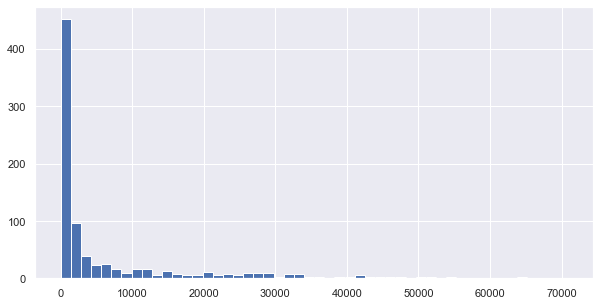

In [35]:
# из гистограммы видно, что доля аптек с маленьким количестом транзакций велика
x = shops['number']
num_bins = 50
plt.figure(figsize=(10, 5))
plt.hist(x, num_bins)
plt.show()

### Самые популярные товары

In [36]:
top_products = data.groupby(['name']).size().reset_index(name='number').sort_values(by=['number'], ascending=False)

In [37]:
top_products['percentage'] = top_products['number'] / data.shape[0] * 100

In [38]:
# первые два товара - НДС (не товар) и пакет (на пакете не заработаем) - нужно будет исключить из рекомендаций
# карта сети аптек - решить, стоит ли считать карту за товар, который можно будет предлагать клиентам

top_products.head(10)

,name,number,percentage
26684,(48791) Свободная сумма НДС18% (служебный),169191,0.845955
18206,(197312) Пакет-майка 25см х 45см,118106,0.590530
13866,(181542) Карта Забота о Здоровье,89851,0.449255
27955,(57733) Корвалол капли д/приема внутрь 25мл,87792,0.438960
8107,(117825) Панангин таб.п.п.о.№50,77153,0.385765
33270,(81509) PL Хлоргексидин биглюконат р-р 0.05% ф...,73543,0.367715
19371,(20116) Тауфон капли глазн 4% фл 10 мл. пласт....,69044,0.345220
31327,(70458) Пенталгин таб.п.п.о.№24 (без кодеина),68622,0.343110
8255,(118125) Кардиомагнил таб.п.п.о.75мг №100,67034,0.335170
13578,(180739) Омепразол-Акрихин капс.кишечнораст.20...,66781,0.333905


### Категории товаров

In [39]:
top_categories = data.groupby(['product_category_id']).size().reset_index(name='number').sort_values(by=['number'], ascending=False)

In [40]:
top_categories['percentage'] = top_categories['number'] / data.shape[0] * 100

In [41]:
# топ 5 самых часто встречающихся категорий товаров

top_categories.head()

,product_category_id,number,percentage
79,170,2969444,14.847220
72,162,1906617,9.533085
46,135,1890878,9.454390
13,101,1363400,6.817000
57,146,1009485,5.047425


### Подкатегории товаров

In [42]:
top_sub_categories = data.groupby(['product_sub_category_id']).size().reset_index(name='number').sort_values(by=['number'], ascending=False)

In [43]:
top_sub_categories['percentage'] = top_sub_categories['number'] / data.shape[0] * 100

In [44]:
# топ 5 самых часто встречающихся подкатегорий товаров

top_sub_categories.head()

,product_sub_category_id,number,percentage
295,738,2555316,12.776580
8,397,841103,4.205515
175,595,749197,3.745985
0,-1,652908,3.264540
13,404,588604,2.943020


### Торговый бренд

In [45]:
# в 80% наблюдений бренд не указан (-1)

In [46]:
data.brand_id.nunique()

1631

In [47]:
top_brands = data.groupby(['brand_id']).size().reset_index(name='number').sort_values(by=['number'], ascending=False)

In [48]:
top_brands['percentage'] = top_brands['number'] / data.shape[0] * 100

In [49]:
top_brands.head()

,brand_id,number,percentage
0,-1,16176371,80.881855
501,1520,881070,4.405350
443,1348,151294,0.756470
598,2038,105401,0.527005
1386,4538,97269,0.486345


### Количество

In [50]:
# переменная пока еще в исходном формате object, не была преобразована
# данные в текстовом виде

# есть ошибки - дробные числа, хотя количество должно быть целым числом

# есть аномально большие значения, например, '130,00', возможно, в этом случае клиентом является юридеческое лицо

# тем не менее, в 97% наблюдений товар покупается в количестве от 1 до 5 шт.
# в 83% наблюдений товар покупается в количестве 1 шт.

In [51]:
list(data.quantity.unique())

['1,00',
 '2,00',
 '0,12',
 '0,004',
 '20,00',
 '3,00',
 '10,00',
 '12,00',
 '0,20',
 '7,00',
 '4,00',
 '0,40',
 '6,00',
 '0,50',
 '5,00',
 '50,00',
 '0,10',
 '0,25',
 '0,66',
 '0,34',
 '0,30',
 '0,80',
 '0,06',
 '11,00',
 '8,00',
 '0,33',
 '0,90',
 '0,04',
 '0,667',
 '98,00',
 '13,00',
 '14,00',
 '15,00',
 '0,067',
 '0,08',
 '30,00',
 '18,00',
 '9,00',
 '0,336',
 '42,00',
 '0,01',
 '0,60',
 '0,02',
 '0,062',
 '0,91',
 '0,333',
 '100,00',
 '0,035',
 '0,05',
 '25,00',
 '0,24',
 '0,16',
 '23,00',
 '7,20',
 '2,80',
 '40,00',
 '21,00',
 '16,00',
 '0,75',
 '22,00',
 '0,357',
 '17,00',
 '0,159',
 '0,041',
 '0,15',
 '0,163',
 '8,96',
 '0,70',
 '0,56',
 '0,44',
 '0,005',
 '0,495',
 '0,334',
 '0,013',
 '0,001',
 '0,11',
 '0,086',
 '0,014',
 '0,09',
 '0,95',
 '0,033',
 '0,14',
 '0,26',
 '0,143',
 '29,00',
 '0,666',
 '0,833',
 '0,32',
 '0,17',
 '32,00',
 '26,00',
 '0,264',
 '0,68',
 '0,167',
 '0,042',
 '0,111',
 '1,58',
 '0,28',
 '0,036',
 '0,015',
 '0,03',
 '0,466',
 '0,083',
 '0,199',
 '33,00',

In [52]:
bought_quantity = data.groupby(['quantity']).size().reset_index(name='number').sort_values(by=['number'], ascending=False)

In [53]:
bought_quantity['percentage'] = bought_quantity['number'] / data.shape[0] * 100

In [54]:
bought_quantity.head()

,quantity,number,percentage
780,"1,00",16729626,83.64813
1013,"2,00",1870682,9.35341
1088,"3,00",431410,2.15705
1153,"5,00",211800,1.05900
1124,"4,00",171686,0.85843
